<a href="https://colab.research.google.com/github/LaurenOKane/Learning-Python/blob/main/M9T4_Non_parametric_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

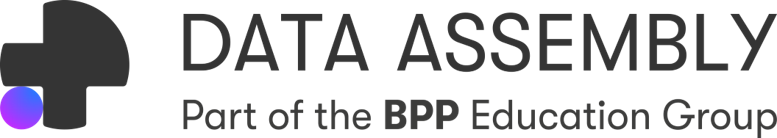

<h3><font color="#AA00BB">How you can use this Notebook</font></h3>
<p>This notebook was written to teach new concepts in data using Python.</p>
<p>You can read through the descriptions run the code (it should work!), or you may be taken through the code by one of our experts.</p>
<p>But one of the best habits to acquire is to re-write the code yourself.</p>
<ul><li>Experiment
<li>Break the code
<li>Build a deeper understanding of both the underlying data concepts and the code</ul>
<p>Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to write more code.</p>
<p>Enjoy!</p>
<p> - <i><font color="#AA00BB">Data Assembly team.</font></i></p>
<br>

> ❓🤔 = a question for us discuss

> ⌨️ = a task for you to try

> 🔑 = an authoritative reference or guide you may find useful

> 🚀 = **optional** material to develop yourself further



<a name="contents"></a>
## Contents

<br>1. [Building a K-Nearest Neighbor Classifier](#section_1)
<br>2. [Decision Tree Classifiers](#section_2)
<br>3. [Tuning a Decision Tree](#section_3)
<br>4. [Building and Tuning a Random Forest Classifier](#section_4)


<h2><font color="#AA00BB">Welcome to our workbook on Non-parametric Modelling!</font></h2>

Non-parametric predictive modelling stands as a cornerstone in predictive analytics, offering robust solutions for analysing and interpreting data that elude the grasp of traditional modelling techniques. Unlike their parametric counterparts, which rely on predefined assumptions about data distribution, non-parametric models thrive in the landscape of ambiguity and complexity.



The typical parametric prerequisites of specific distribution forms, such as normality, do not constrain them. Instead, they adapt flexibly to the underlying structure of the data, making them indispensable for scenarios where the data reveals no apparent pattern or follows an unconventional distribution, thereby ensuring a more nuanced and tailored analytical approach.

Let's get started!

<a name="section_1"></a>

# **1. Building a K-Nearest Neighbor Classifier**



[Return to contents](#contents)


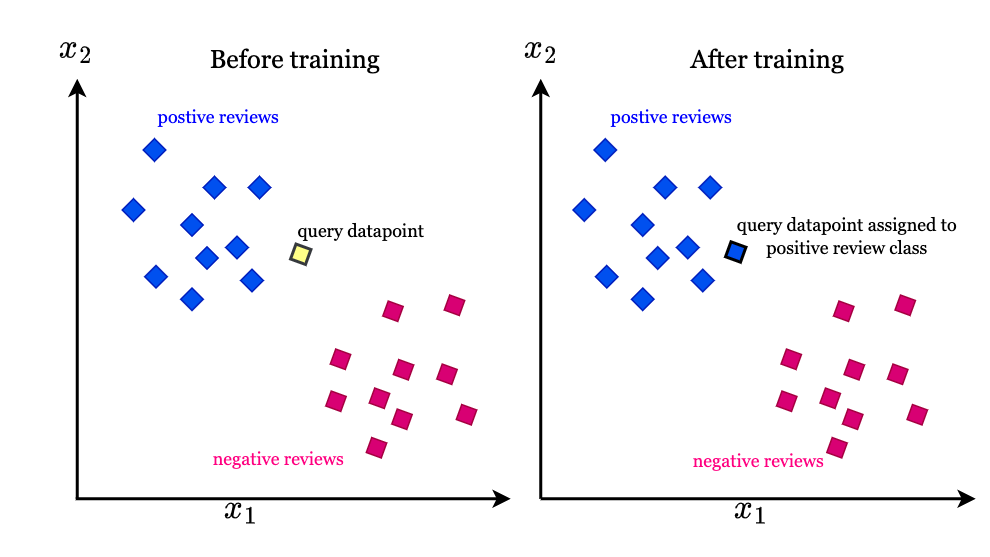

The **k-Nearest Neighbors (KNN)** algorithm is a non-parametric method used for classification and regression that predicts the label of a data point by looking at the 'k' closest labelled data points, taking a majority vote for classification or averaging for regression. It is considered non-parametric because it makes no assumptions about the underlying data distribution, allowing it to flexibly adapt to the actual structure of the data.

First, we'll load the dataset and take a preliminary look at its structure, types of variables, and any preprocessing needs.

#### **Our Data**

We'll be usign the **Car Evaluation** dataset from (https://archive.ics.uci.edu/dataset/19/car+evaluation)

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

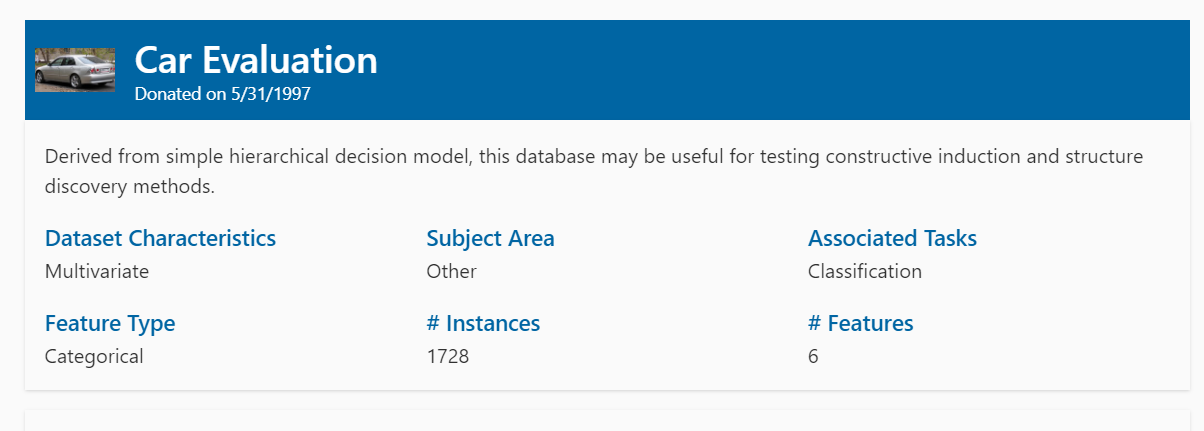

In [ ]:
import pandas as pd

# Assuming the file is named 'car_evaluation.csv'
file_path = 'https://raw.githubusercontent.com/BPP-Digital-Advanced-Data-Analytics/public_datasets/main/car_evaluation.csv'
data = pd.read_csv(file_path)
data.head()

,buying_price,maintenance_cost,number_of_doors,nunber_of_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### **1.1 Preprocessing**

- **Encode Categorical Variables**: If the features are categorical, use LabelEncoder or OneHotEncoder from scikit-learn.preprocessing to encode them into numerical values.
- **Feature Scaling:** KNN is sensitive to the scale of the data, so scale the features using StandardScaler or MinMaxScaler.
- **Split the Dataset:** Use train_test_split from scikit-learn.model_selection to split the data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Assuming all features are categorical and the target variable is the last column
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable - decision

# Encode categorical variables
# For this example, we'll assume all features are categorical and need to be encoded
# OneHotEncoder for features (if they are nominal)
# LabelEncoder for the target variable (if it's categorical)

# If using OneHotEncoder for feature encoding
categorical_features = X.columns
one_hot_encoder = ColumnTransformer([
    ("one_hot", OneHotEncoder(), categorical_features)],
    remainder="passthrough"
)
X_encoded = one_hot_encoder.fit_transform(X)

# Label encoding for the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Feature Scaling
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_encoded)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Now, X_train and X_test are ready to be used with a KNN classifier.

### **1.2 Model Construction**
Initialise and Train KNN Classifier:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the KNN classifier with n_neighbors=5 as an example
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn.predict(X_test)

### **1.3 Model Evaluation**
**Evaluate the Model:** Use accuracy, precision, recall, and F1 score to evaluate the model's performance. classification_report from scikit-learn.metrics can provide most of these metrics.


In [ ]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print(classification_report(y_test, predictions))

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.86      0.53      0.66        83
           1       0.35      0.55      0.43        11
           2       0.84      1.00      0.91       235
           3       0.00      0.00      0.00        17

    accuracy                           0.82       346
   macro avg       0.52      0.52      0.50       346
weighted avg       0.79      0.82      0.79       346



### **1.4 Interpretation of results**

The model demonstrates high overall accuracy (82%) with strong performance in class 2, but shows significant variability in precision, recall, and F1-score across classes, indicating potential issues with class imbalance and misclassification, particularly for classes 0, 1, and 3.

#### **Why KNN's performance might not be adequate**

- Sensitive to noise and irrelevant features, leading to misclassification.
- Performance deteriorates in high-dimensional spaces due to the curse of dimensionality.
- Choice of 'k' and distance metric crucial; inappropriate choices can affect accuracy.

##⌨️ **Exercise**

1. **Simple**: Experiment with different values of k and see how they affect performance. (Code required)
2. **Challenging (Optional🚀)**: Using the Python library called 'time', compare how long it takes to run knn.predict(X_test) using various values of k. What do you observe.(Code required)



```
import time

# Capture the start time
start_time = time.time()

# Your block of code to time
for i in range(1000000):
    pass  # Replace this pass statement with your actual code

# Capture the end time
end_time = time.time()

# Calculate the duration
duration = end_time - start_time

print(f"The code block took {duration} seconds to execute.")

```




---

<a name="section_2"></a>

# **2. Decision Tree Classifiers**



[Return to contents](#contents)


Following our exploration of the k-Nearest Neighbors (KNN) as a non-parametric model, let's delve into decision trees, another non-parametric technique that segments the feature space into regions defined by decision rules based on the features. Unlike KNN, which relies on the proximity to the nearest observations, decision trees make decisions by sequentially asking questions to drill down to the predictions, offering a clear, interpretable model structure without assuming any form for the underlying data distribution.

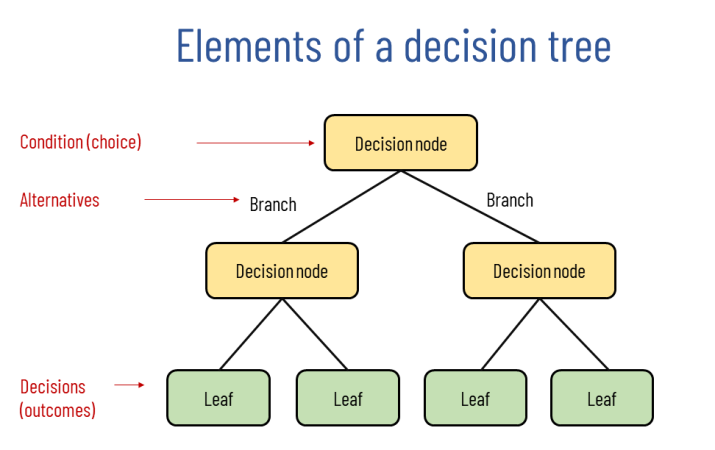

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# For the Decision Tree
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, predictions_dt)
print(f"Accuracy: {accuracy:.2f}")

predictions_dt = dt.predict(X_test)  # Assuming dt is your decision tree model
cm_dt = confusion_matrix(y_test, predictions_dt)
print("Decision Tree Confusion Matrix:")
print(cm_dt)
print(classification_report(y_test, predictions_dt))

Accuracy: 0.96
Decision Tree Confusion Matrix:
[[ 72   4   5   2]
 [  0  10   0   1]
 [  0   0 235   0]
 [  1   2   0  14]]
              precision    recall  f1-score   support

           0       0.99      0.87      0.92        83
           1       0.62      0.91      0.74        11
           2       0.98      1.00      0.99       235
           3       0.82      0.82      0.82        17

    accuracy                           0.96       346
   macro avg       0.85      0.90      0.87       346
weighted avg       0.96      0.96      0.96       346



### **2.2 Plotting the Decision Tree:**

To visualise the Decision Tree, we can use plot_tree from sklearn.tree.

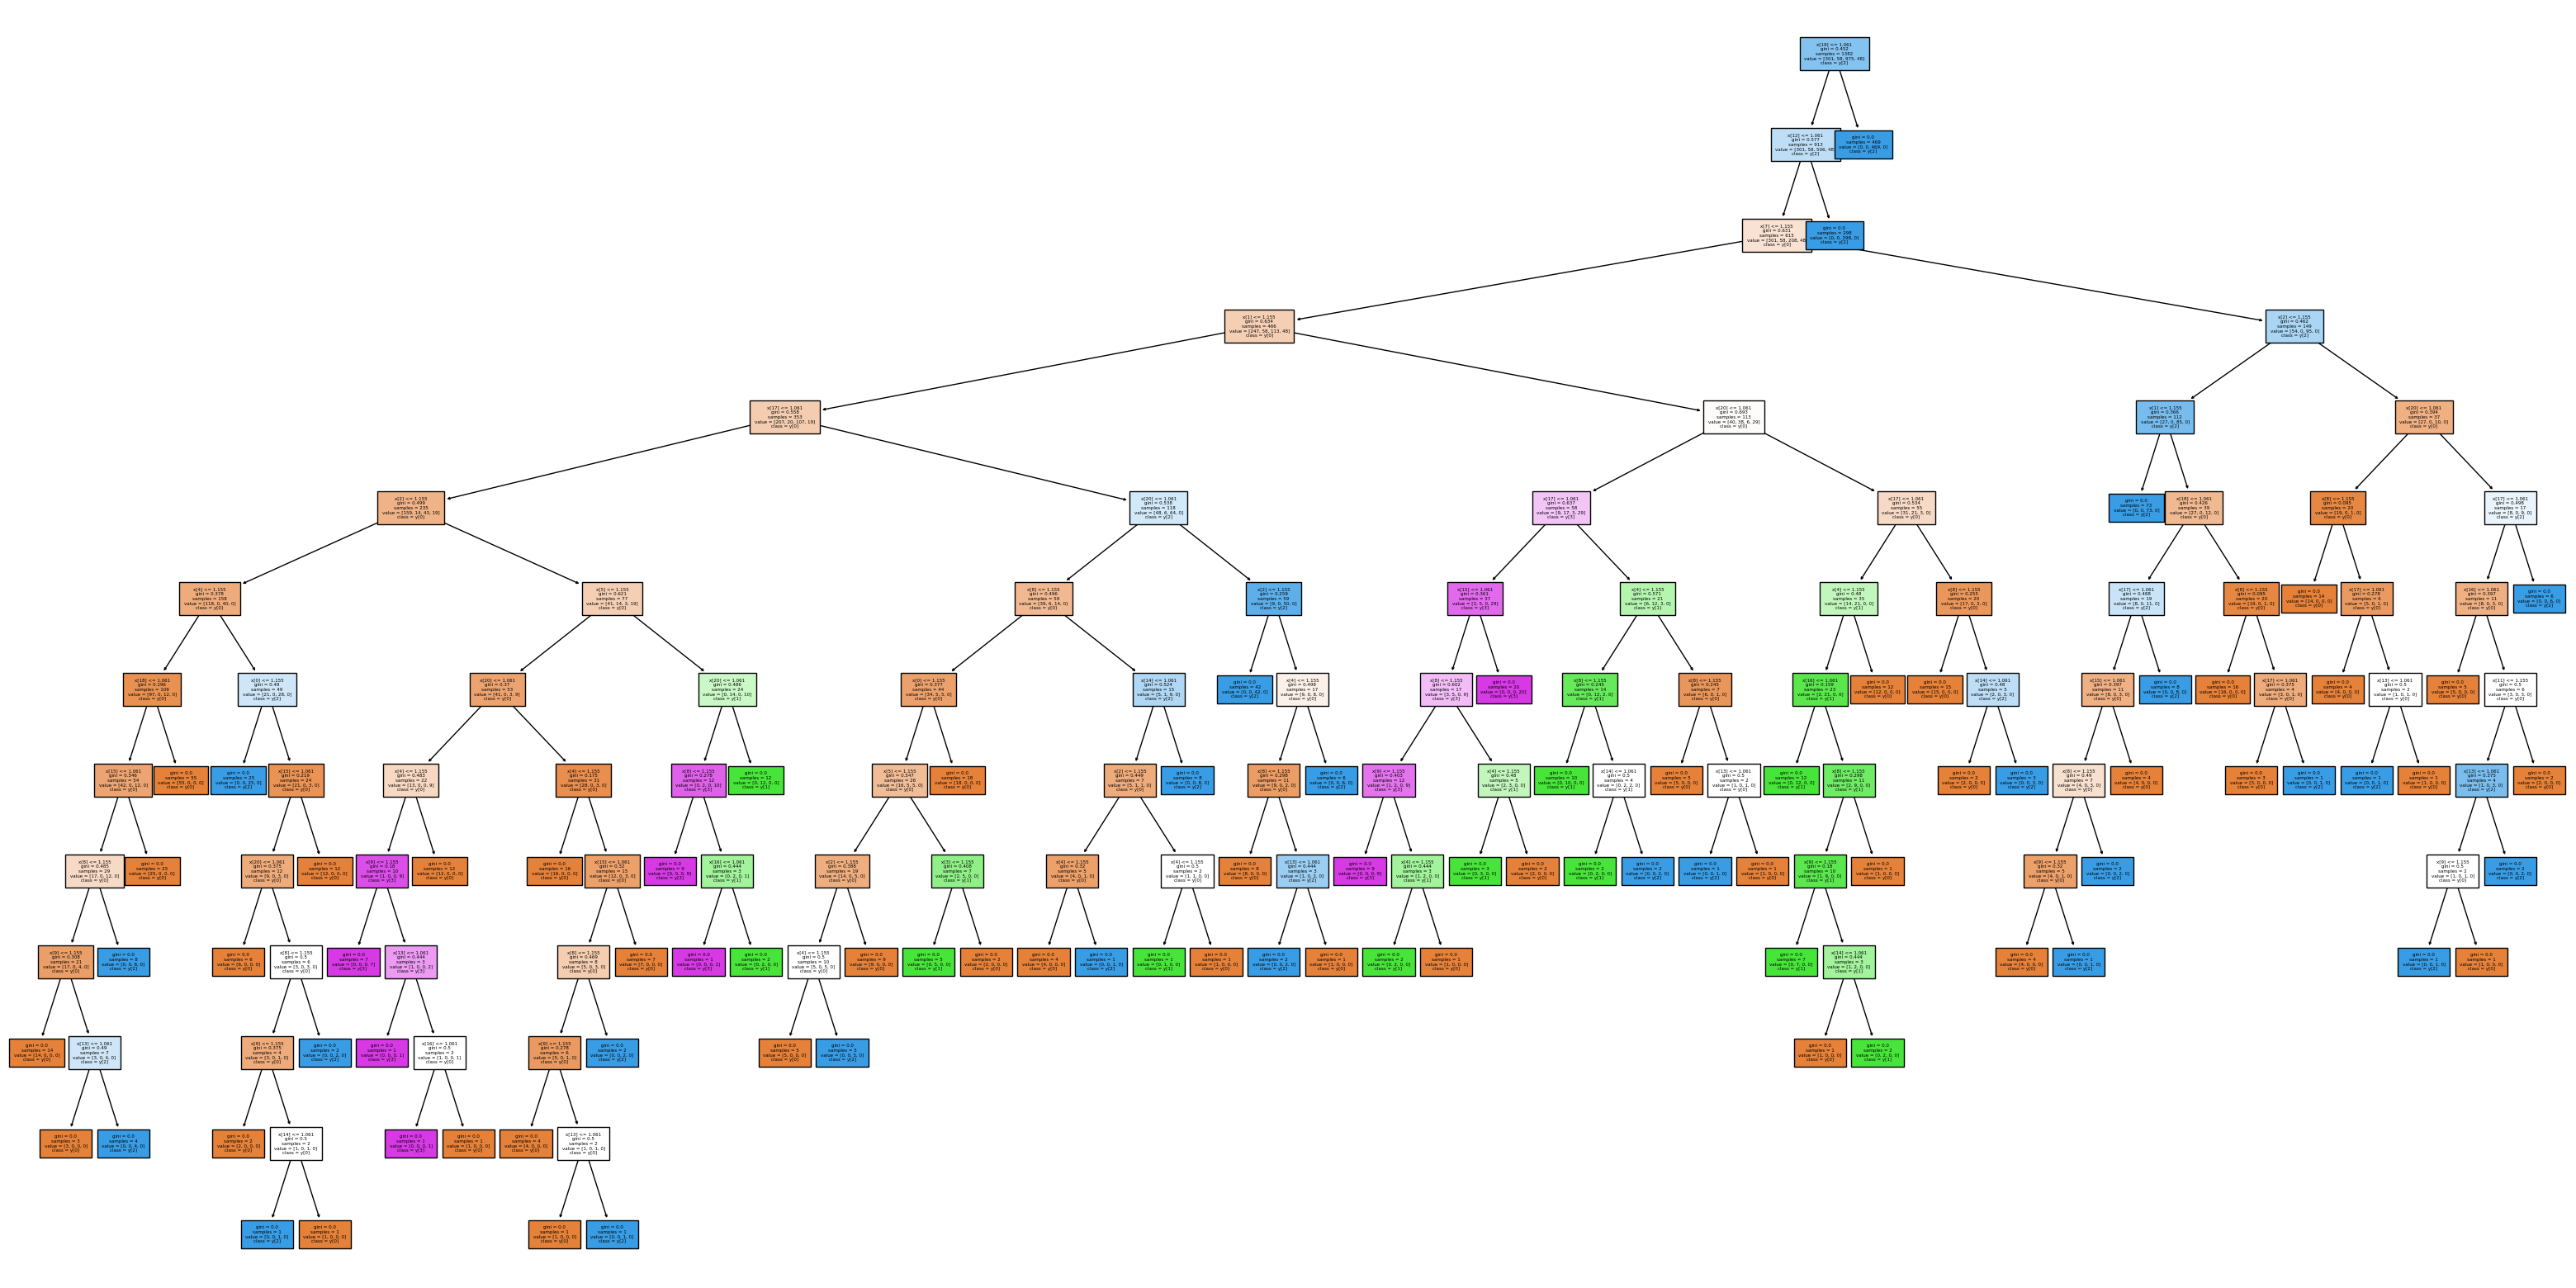

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 20))
plot_tree(dt, filled=True, class_names=True, fontsize=4)
plt.show()

### **2.3 Interpretation of this tree diagram**

- Each internal node represents a decision based on an attribute, each branch represents the outcome of that decision, and each leaf node represents a final output or class label.
- The colour-coded leaves may indicate different classes or outcomes, with the branching structure showing the path of decisions leading to these outcomes based on input features.
- Depth of our tree is 14
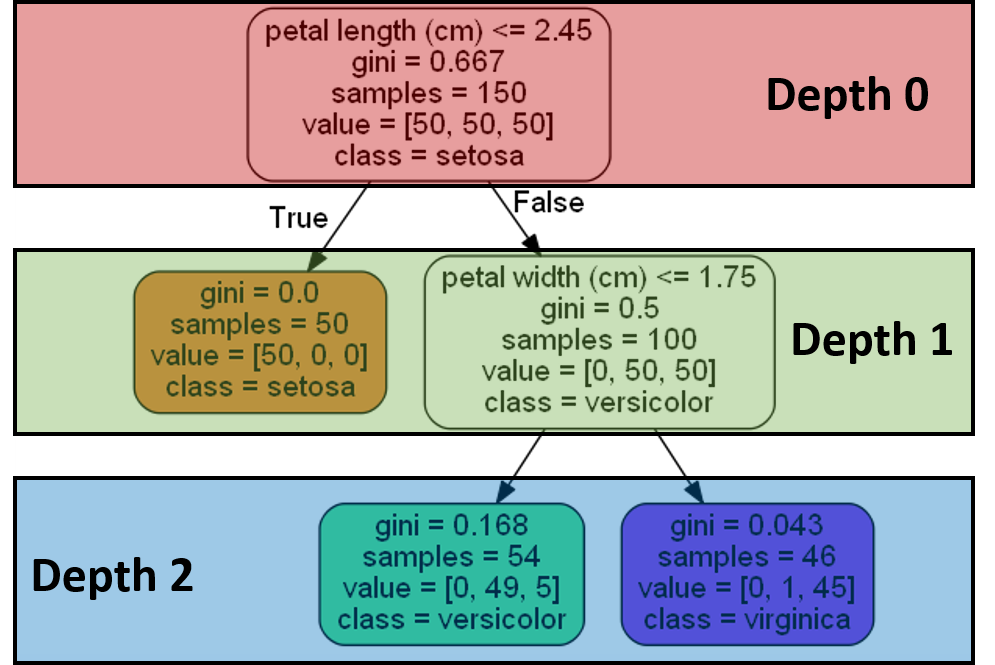
This tree is a bit difficult to follow! Let's make it simpler

##⌨️ **Exercise**

1. **Simple**: Analyse and compare the performance (accuracy, precision, recall) the performance difference between the KNN and Decision tree classifer. (Code required)
2. **Challenging (Optional🚀)**: Experiment with different criteria (gini and entropy) for splitting. Evaluate their impact on the model accuracy and provide a brief analysis. (Code required)


---

<a name="section_3"></a>

# **3. Tuning a Decision Tree**



[Return to contents](#contents)


Let's make our decision tree a bit more simple.

Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.78      0.67        83
           1       0.00      0.00      0.00        11
           2       0.92      0.93      0.93       235
           3       0.00      0.00      0.00        17

    accuracy                           0.82       346
   macro avg       0.38      0.43      0.40       346
weighted avg       0.77      0.82      0.79       346



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


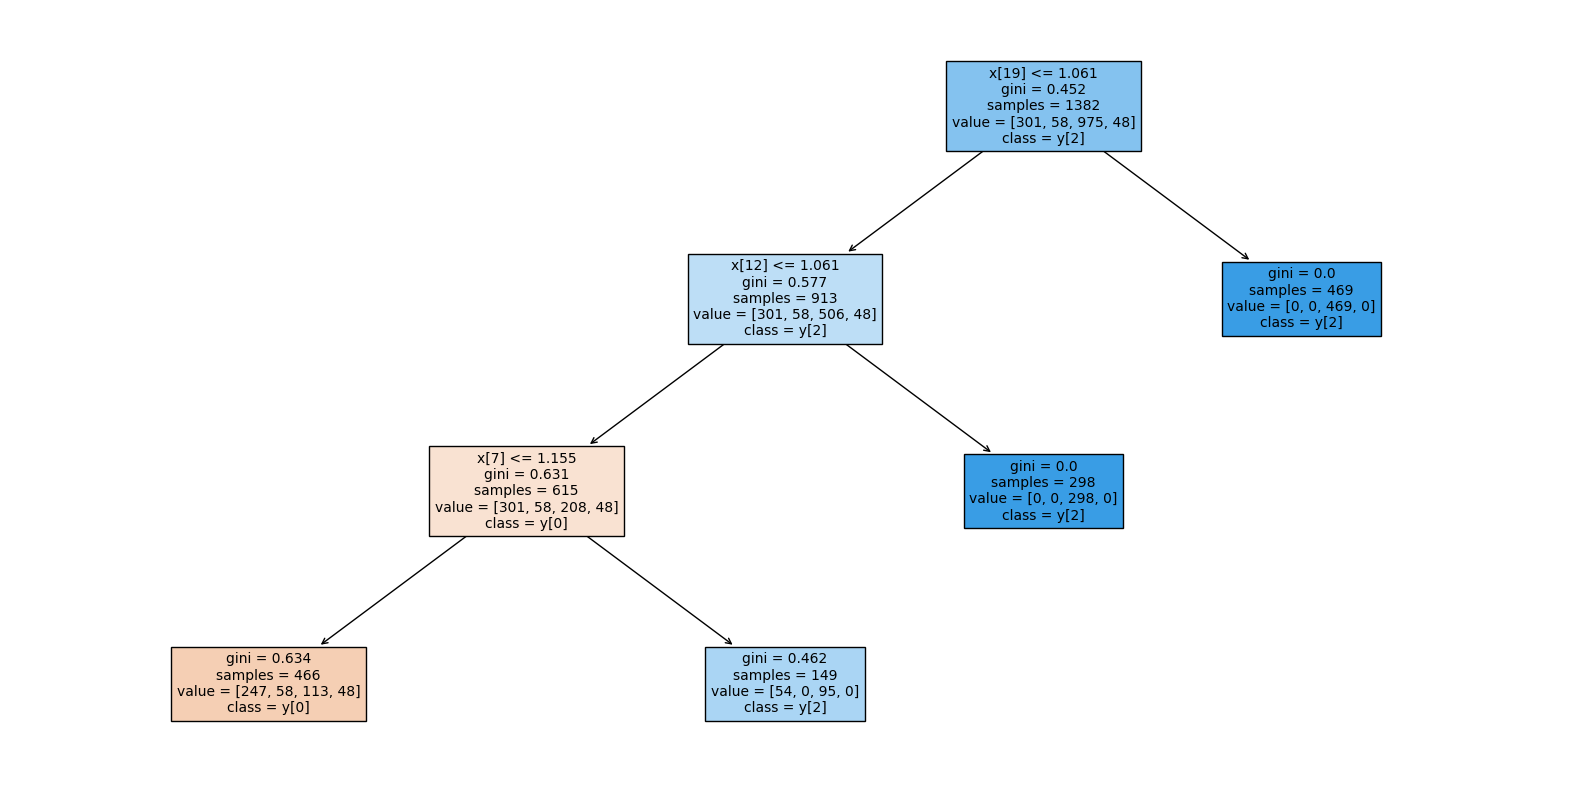

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Initialize the Decision Tree Classifier with a max_depth parameter
dt_simple = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fit the model to the training data
dt_simple.fit(X_train, y_train)

# Make predictions on the test set
predictions_dt_simple = dt_simple.predict(X_test)

# Evaluate the model
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, predictions_dt_simple)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, predictions_dt_simple))

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_simple, filled=True, class_names=True, fontsize=10)
plt.show()

#### **How do interpret this diagram?**

We can see the depth of our tree is now just 4! much smaller!

Also, we can see that it splits based on x[19].....what's x[19]? Remember we perform one-hot encoding on our input data, thus expanding the number of dimensions. You can see column names by:

In [ ]:
# Fit the ColumnTransformer to the data
one_hot_encoder.fit(X)

# Retrieve the feature names from the one_hot_encoder
# This method gets the feature names from all transformers and concatenates them appropriately
feature_names = one_hot_encoder.get_feature_names_out()

# Print the encoded feature names
print(feature_names)

['one_hot__buying_price_high' 'one_hot__buying_price_low'
 'one_hot__buying_price_med' 'one_hot__buying_price_vhigh'
 'one_hot__maintenance_cost_high' 'one_hot__maintenance_cost_low'
 'one_hot__maintenance_cost_med' 'one_hot__maintenance_cost_vhigh'
 'one_hot__number_of_doors_2' 'one_hot__number_of_doors_3'
 'one_hot__number_of_doors_4' 'one_hot__number_of_doors_5more'
 'one_hot__nunber_of_persons_2' 'one_hot__nunber_of_persons_4'
 'one_hot__nunber_of_persons_more' 'one_hot__lug_boot_big'
 'one_hot__lug_boot_med' 'one_hot__lug_boot_small' 'one_hot__safety_high'
 'one_hot__safety_low' 'one_hot__safety_med']


##⌨️ **Exercise**

1. **Simple**: Generate and interpret a confusion matrix for the Random Forest model predictions on the test set.(Code required)
2. **Challenging (Optional🚀)**: Analyse and compare the performance (accuracy, precision, recall) of the Random Forest model versus the decision tree model you made in Section 2.(Code required)


---

<a name="section_4"></a>

# **4. Building and Tuning a Random Forest Classifier**



[Return to contents](#contents)

Introduction to Random Forest
Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes of the individual trees for classification tasks, or mean prediction for regression tasks. It's a strong model with capabilities for both classification and regression problems.

**Why Use Random Forest?**

- Accuracy: Random Forests tend to give a more accurate model compared to individual decision trees due to the ensemble effect.

- Overfitting: It reduces the risk of overfitting by averaging multiple trees.

- Feature Importance: It can handle large datasets with higher dimensionality and can estimate which variables are important in the underlying data being modeled.

- Versatility: It can be used for both regression and classification tasks.

### **4.1 Building the Randon Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.2f}")


[[ 70   7   4   2]
 [  0  10   0   1]
 [  0   0 235   0]
 [  2   0   0  15]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        83
           1       0.59      0.91      0.71        11
           2       0.98      1.00      0.99       235
           3       0.83      0.88      0.86        17

    accuracy                           0.95       346
   macro avg       0.84      0.91      0.87       346
weighted avg       0.96      0.95      0.95       346

Accuracy: 0.95


### **4.2 Interpreting the Results**


The Random Forest model achieved 95% overall accuracy with high precision and recall for most classes, particularly excelling in class 2 with perfect recall, indicating a strong performance across the dataset.

### **4.3 Tuning the Random Forest Model using Grid Search**

Random Forest has several hyperparameters that can be tuned to improve the model's performance.

- n_estimators: Number of trees in the forest.
- max_features: The number of features to consider when looking for the best split.
- max_depth: The maximum depth of each tree.
- min_samples_split: The minimum number of samples required to split an internal node.
- min_samples_leaf: The minimum number of samples required to be at a leaf node.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
best_rf = grid_search.best_estimator_
best_rf_predictions = best_rf.predict(X_test)
print(f"Accuracy of the best model: {accuracy_score(y_test, best_rf_predictions):.2f}")

Accuracy of the best model: 0.95


##⌨️ **Exercise**

1. **Simple**: Use GridSearchCV to find the optimal max_depth for the Random Forest model on the Iris dataset.(Code required)
2. **Challenging (Optional🚀)**: Implement a function that performs a manual grid search (without using GridSearchCV) for the best max_depth and min_samples_split parameters on a Random Forest model. Compare your findings with GridSearchCV results. (Code required)


---